<a href="https://colab.research.google.com/github/RodrigoZonzin/complex_networks/blob/main/atv3/atv3_redesComplexas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Rede Social de Golfinhos

In [5]:
dolphins_net = nx.read_gml('/content/drive/MyDrive/Faculdade/redes_complexas/dolphins/dolphins.gml')

In [6]:
df_dolphins = pd.DataFrame(columns= ['closeness', 'betweenness', 'eigencentrality'])

In [133]:
def describe_network(net):
  print(f'Num od Nodes: {net.number_of_nodes()}')
  print(f'Num od Edges: {net.number_of_edges()}')
  print(f'Desidade: {nx.density(net):.4f}')
  print(f'Clustering médio: {nx.average_clustering(net):.4f}')
  print(f"Distância média {nx.average_shortest_path_length(net)}")

  df_dolphins['closeness'] = nx.closeness_centrality(net)
  df_dolphins['betweenness'] = nx.betweenness_centrality(net)
  df_dolphins['eigencentrality'] = nx.eigenvector_centrality(net)
  df_dolphins['degree'] = [a[1] for a in nx.degree(net)]

In [134]:
describe_network(dolphins_net)
df_dolphins

Num od Nodes: 62
Num od Edges: 159
Desidade: 0.0841
Clustering médio: 0.2590
Distância média 3.3569539925965097


,closeness,betweenness,eigencentrality,degree
Beak,0.346591,0.019083,0.128504,6
Beescratch,0.371951,0.213324,0.042091,8
Bumper,0.282407,0.009073,0.039757,4
CCL,0.308081,0.002374,0.079334,3
Cross,0.248980,0.000000,0.029287,1
...,...,...,...,...
Web,0.301980,0.084205,0.017402,9
Whitetip,0.248980,0.000000,0.027332,1
Zap,0.342697,0.020333,0.111819,5
Zig,0.178363,0.000000,0.000537,1


In [92]:
df_dolphins.describe()

,closeness,betweenness,eigencentrality,degree
count,62.000000,62.000000,62.000000,62.000000
mean,0.307240,0.039283,0.090777,5.129032
std,0.052027,0.050965,0.089542,2.955871
min,0.178363,0.000000,0.000537,1.000000
25%,0.261567,0.003083,0.018322,3.000000
50%,0.316062,0.021630,0.047450,5.000000
75%,0.338889,0.056086,0.158907,7.000000
max,0.417808,0.248237,0.315781,12.000000


## Plot da Rede

In [46]:
pos = nx.spring_layout(dolphins_net, seed=675)

In [86]:
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(9, 9))
    nodes = nx.draw_networkx_nodes(G, pos, cmap=plt.cm.plasma,
                                   node_color= list(measures),
                                   edgecolors= 'black',
                                   nodelist=measures.keys(),
                                   node_size = list(measures))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes, location = 'bottom', fraction=0.046, pad=0.04)
    plt.axis('off')
    plt.show()

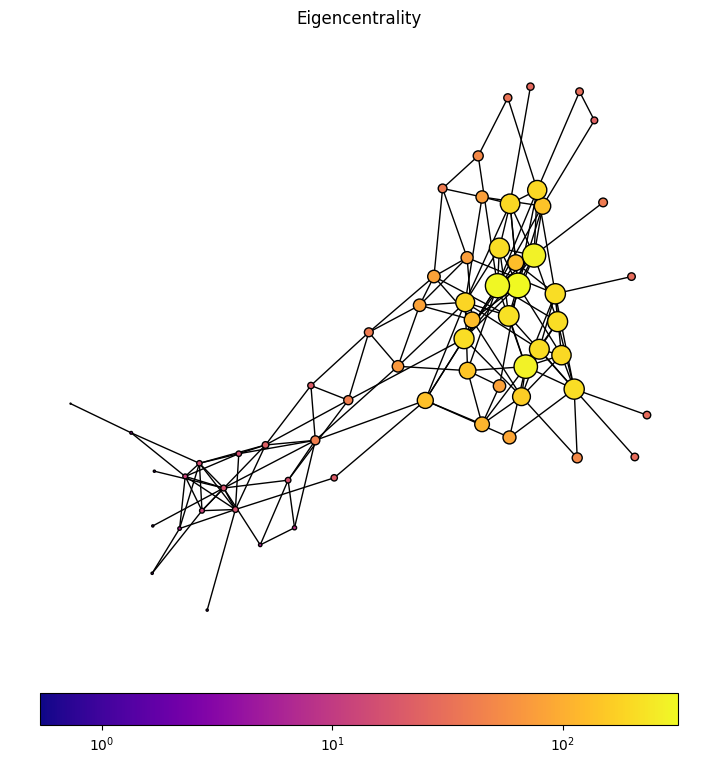

In [89]:
draw_net(dolphins_net, pos, df_dolphins['eigencentrality']*1000, "Eigencentrality")

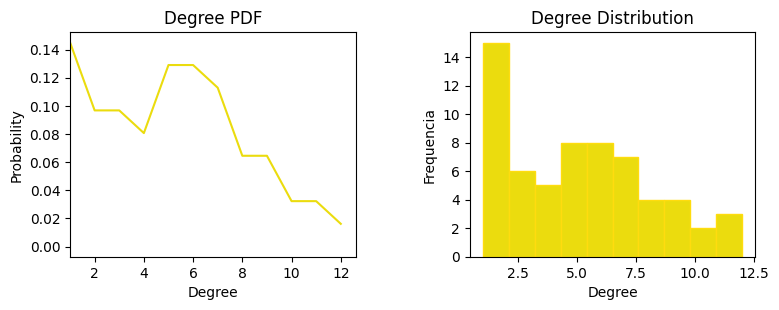

In [119]:
# Calculate the frequency counts
degree_counts = nx.degree_histogram(dolphins_net)

# Normalize the frequency counts to get probabilities
total_nodes = dolphins_net.order()
degree_probs = [count / total_nodes for count in degree_counts]


# Plot the PDF
fig = plt.figure(figsize=(14,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(231)
plt.plot(degree_probs, '-', color='#ebdc0e')
plt.title('Degree PDF')
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.xlim(left=1)

#plot the histogram
plt.subplot(232)
plt.hist(df_dolphins['degree'], bins=10, color='#ebdc0e', edgecolor='#ffdc0e')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequencia')
plt.show()

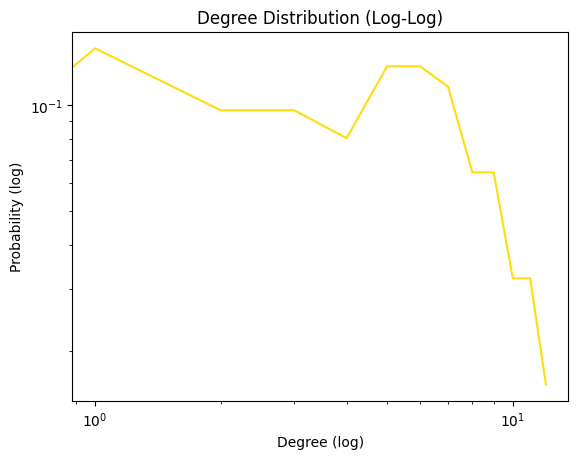

In [130]:
# Plot the degree distribution on a log-log scale
plt.loglog(range(len(degree_probs)), degree_probs, '-', color='#ffdc0e')
plt.title('Degree Distribution (Log-Log)')
plt.xlabel('Degree (log)')
plt.ylabel('Probability (log)')
plt.show()